In [2]:
# Libraries and settings
import pandas as pd
import seaborn as sns

# Import the tweets dataset
tweets = pd.read_csv('tweets.csv')

# Get info
tweets.info

<bound method DataFrame.info of       created_at            id        id_str  \
0     23/05/2022  1.528750e+18  1.528750e+18   
1     23/05/2022  1.528720e+18  1.528720e+18   
2     23/05/2022  1.528650e+18  1.528650e+18   
3     23/05/2022  1.528610e+18  1.528610e+18   
4     23/05/2022  1.528600e+18  1.528600e+18   
...          ...           ...           ...   
3955  19/05/2022  1.527280e+18  1.527280e+18   
3956  18/05/2022  1.526910e+18  1.526910e+18   
3957  17/05/2022  1.526550e+18  1.526550e+18   
3958  16/05/2022  1.526190e+18  1.526190e+18   
3959  15/05/2022  1.525900e+18  1.525900e+18   

                                                   text truncated  \
0     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...     False   
1     #COVID19 is linked to more #diabetes diagnoses...     False   
2     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...     False   
3     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...     False   
4     Advanced healthcare at your fingertips\n

In [4]:
# Print the DataFrame
print(tweets.shape)
print(tweets.dtypes)
tweets.head()

(3960, 21)
created_at                    object
id                           float64
id_str                       float64
text                          object
truncated                     object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name      float64
contributors                 float64
is_quote_status               object
retweet_count                  int64
favorite_count                 int64
favorited                     object
retweeted                     object
lang                          object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str         float64
dtype: object


,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [5]:
tweets['text'] = tweets['text'].astype(str)
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [7]:
# Loop through the messages and create a list of values containing the # symbol
tags = []
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z: 
            tags.append(z)

# Create a Series containing the value counts in our list
tags=pd.Series(tags).value_counts()

In [8]:
# Display the first 30 records
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [9]:
# Convert the series to a dataframe in preparation for visualisation
# Let's use all the workds up to risk and remove the whitespace
data = pd.DataFrame(tags).reset_index()

#Rename the columns
data.columns = ['word', 'count']

#Fix count datatype
data['count'] = data['count'].astype(int)

data

,word,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
...,...,...
4771,hospital.\n#CovidIsNotOver,1
4772,#OmicronIsNotMild,1
4773,#Covid19NSW,1
4774,#CovidNSW,1


In [10]:
# Display records where the count is larger than 100
display(data.loc[(data['count']>100)])

,word,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103


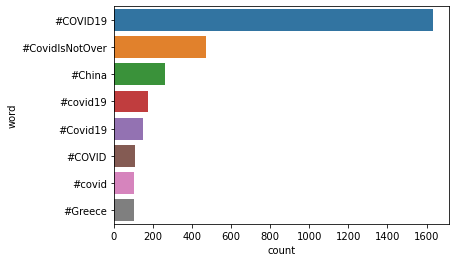

In [13]:
# Plot the records where the count is larger than one hundred
# Using Seaborn barplot with the y set to 'words'
ax = sns.barplot(x='count', y='word', data=data.loc[(data['count']>100)])

In [63]:
# Manual list of stopwords to be removed
url = 'https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt?raw=True'
sw_list = pd.read_csv(url).values.tolist()
sw_list.extend(('the', 'to', 'of', 'in', 'and', 'a', \
               'for', 'is', 'on', 'from', 'are', 'with', \
               'by', 'that','&amp;', '-', 'at', 'have', \
                'I', 'it', 'be', 'you', 'as', 'not', \
               'this', 'that', 'was', 'were', 'up', '|', \
               'has', 'will', 'they', 'more', 'can', 'my', \
               'or', 'all', 'we', 'been', 'but', 'about', \
               'an', 'me', 'our', 'your', 'who', 'its', 'i'))

print(sw_list[100:])

[['too'], ['thy'], ['thyself'], ['thus'], ['than'], ['that'], ['those'], ['thou'], ['though'], ['thous'], ['thouses'], ['thoroughest'], ['thorougher'], ['thorough'], ['thoroughly'], ['thru'], ['thruer'], ['thruest'], ['thro'], ['through'], ['throughout'], ['throughest'], ['througher'], ['thine'], ['this'], ['thises'], ['they'], ['thee'], ['the'], ['then'], ['thence'], ['thenest'], ['thener'], ['them'], ['themselves'], ['these'], ['therer'], ['there'], ['thereby'], ['therest'], ['thereafter'], ['therein'], ['thereupon'], ['therefore'], ['their'], ['theirs'], ['thing'], ['things'], ['three'], ['two'], ['o'], ['oh'], ['owt'], ['owning'], ['owned'], ['own'], ['owns'], ['others'], ['other'], ['otherwise'], ['otherwisest'], ['otherwiser'], ['of'], ['often'], ['oftener'], ['oftenest'], ['off'], ['offs'], ['offest'], ['one'], ['ought'], ['oughts'], ['our'], ['ours'], ['ourselves'], ['ourself'], ['out'], ['outest'], ['outed'], ['outwith'], ['outs'], ['outside'], ['over'], ['overallest'], ['over

In [64]:
# Convert the text of the tweets to a list of tweets
tweets_text_values = tweets_text.values

# Convert each of the tweets to a list of words
tweets_text_values_words = [x.split(' ') for x in tweets_text_values]

# Create empty list
tweets_text_values_words_all = []

# Append to the list and remove http, mentions, and, selected keywords
tweets_text_values_words_all = [z for y in tweets_text_values_words \
                               for z in y if 'http' not in z \
                               and not z.startswith(('@','#')) \
                               and z.lower() not in sw_list]

# Create a series with the value counts of keywords identified
tweets_text_values_words_all = pd.Series(tweets_text_values_words_all).value_counts()

In [65]:
# Display the first 50 entries of the Series
tweets_text_values_words_all.head(50)

              1738
Covid          348
people         303
Greece         275
COVID-19       267
cases          228
Athens,        211
Athens         209
new            205
COVID          198
Covid-19       153
being          152
vaccine        147
COVID19        143
China          141
covid          140
May            136
now            136
their          135
out            126
per            126
I’m            125
like           125
way            124
over           123
after          119
cause          118
get            118
so             113
still          113
just           111
safe           111
New            111
how            111
via            110
had            109
first          108
pandemic       106
no             104
Please         104
may            101
until          100
join           100
–               99
during          99
than            98
do              97
said            97
protection      96
reported        95
dtype: int64

In [66]:
# Use the Series to create a dataframe in preparation for visualisation

# Lets use all the words up to risk and remove the whitespace
data2 = pd.DataFrame(tweets_text_values_words_all.head(16)).reset_index()

# Rename the columns
data2.columns = ['word', 'count']

In [67]:
# Display the resul
data2 = data2[data2['word'].str.strip('word') != ""]
data2

,word,count
1,Covid,348
2,people,303
3,Greece,275
4,COVID-19,267
5,cases,228
6,"Athens,",211
7,Athens,209
8,new,205
9,COVID,198
10,Covid-19,153


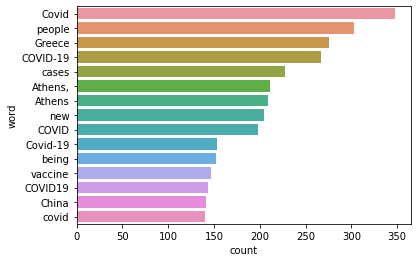

In [68]:
# Display the result as a horizontal barplot
ax = sns.barplot(x='count', y='word', data=data2)

In [69]:
dft = pd.DataFrame(tweets_text_values)
dft.columns = ['Tweets']

In [71]:
# Create a subset of the dataframe containing only tweets with the identified keywords
subset = dft[dft['Tweets'].str.contains('Covid')]

# Loop through the dataframe and print each element
for i in subset.index:
    print('Tweet: ', i)
    print(subset.loc[i, 'Tweets'], '\n')

Tweet:  7
Out of the hospital from DKA.. now I tested positive for Covid… why me #T1D #Diabetes #COVID19 

Tweet:  57
#IDFPodcast - Join host @not_defeated as she welcomes Drs. @gillianlbooth &amp; @pandoralucrezia for an in-depth discussion on the connections between #Covid19 and #diabetes. Listen on Spotify: https://t.co/04dXFAI1uj https://t.co/0sa99c4SAw 

Tweet:  60
“It took a while to convince me,” said Al-Aly, who directs the clinical epidemiology center at the Veterans Affairs St. Louis Health Care System in Missouri. “It was hard to believe that Covid could be doing this.”

#LongCovid #Diabetes 
 https://t.co/aZ5QOr5ao0 

Tweet:  61
Decoding the #COVID19 connection with diabetes #LongCovid 

https://t.co/pVDlI4RjgU 

Tweet:  68
#IDFPodcast - Join host @not_defeated as she welcomes Drs. @gillianlbooth &amp; @pandoralucrezia for an in-depth discussion on the connections between #Covid19 and #diabetes. Listen on Spotify: https://t.co/7s89RuR27M https://t.co/wQMWvlSCKl 

Tweet:  78

Tweet:  1185
More #covid #COVID19 around me today, folks. 😷 up and stay healthy. #CovidIsNotOver 

Tweet:  1186
#CovidIsNotOver What is over is precautions.
What is not over is virus mutation. What is over is significant increase in vaccination rate. #COVID19 https://t.co/Qmws1uu7td 

Tweet:  1187
these covid denier clowns dont even want the most lockdown place in the world to lockdown for #COVID19 bunchafuckingidiots 
The 'let it spread' crowd are committing a crime against humanity, they'll never pay, only those who listen to them
#CovidIsNotOver https://t.co/eGx0qtQV2H https://t.co/qTBfTCtC1q 

Tweet:  1188
Looks like $THRM | $TBRIF &amp; #AcuVid™ | @bright_therma | https://t.co/LAJrYXujYw might be getting an itch to travel north this morning.

 #BottomFishing🎣 #COVID #Covid19AB #CovidTesting #CovidIsNotOver #CovidTest #COVID19 #OmicronVirus #RapidTesting #SalivaTest #RapidTest 

Tweet:  1189
Every home in the U.S. is eligible to order a 3rd round of free at-home #COVID19 tests. Ord

Tweet:  3597
The other side of the story😕

#bhent_india #mask #maskusdt #Covid_19 #CivilWar2 #CitiCBS #CovidIsNotOver #content #coronavirus #CostOfLivingCrisis #oceans #savetheplanet #savetheplanet #SaveSoilAtCOP15 #SaveAzov #Savetheturtles #SEAGames31 #sea #life #lifestyle #Crypto #comic https://t.co/g84XQ9OWDw 

Tweet:  3598
has anyone had a dry cough or constant tiredness for months after Covid? 

Tweet:  3602
Getting Covid thoroughly fucked up my sleep schedule 💀 

Tweet:  3604
Covid hi theek hai. Not ready for this monkeypox thing. 

Tweet:  3606
JUST IN: Pfizer says Covid vaccine for children under five years of age effective with three doses.

"A Patient for Life" https://t.co/ESNFJMkaQn 

Tweet:  3609
So Covid funding… Mom’s assisted living staff informed me that they are no longer testing for Covid—in a high transmission county—because of testing price. Spoke with another administrator for perspective. Turns out gov used to provide for free, now $3K. @DrEricDing @PeterHotez 

